QPSK simulation completed. Bit Error Rate (BER): 0.5030. Plot saved as qpsk_simulation.png


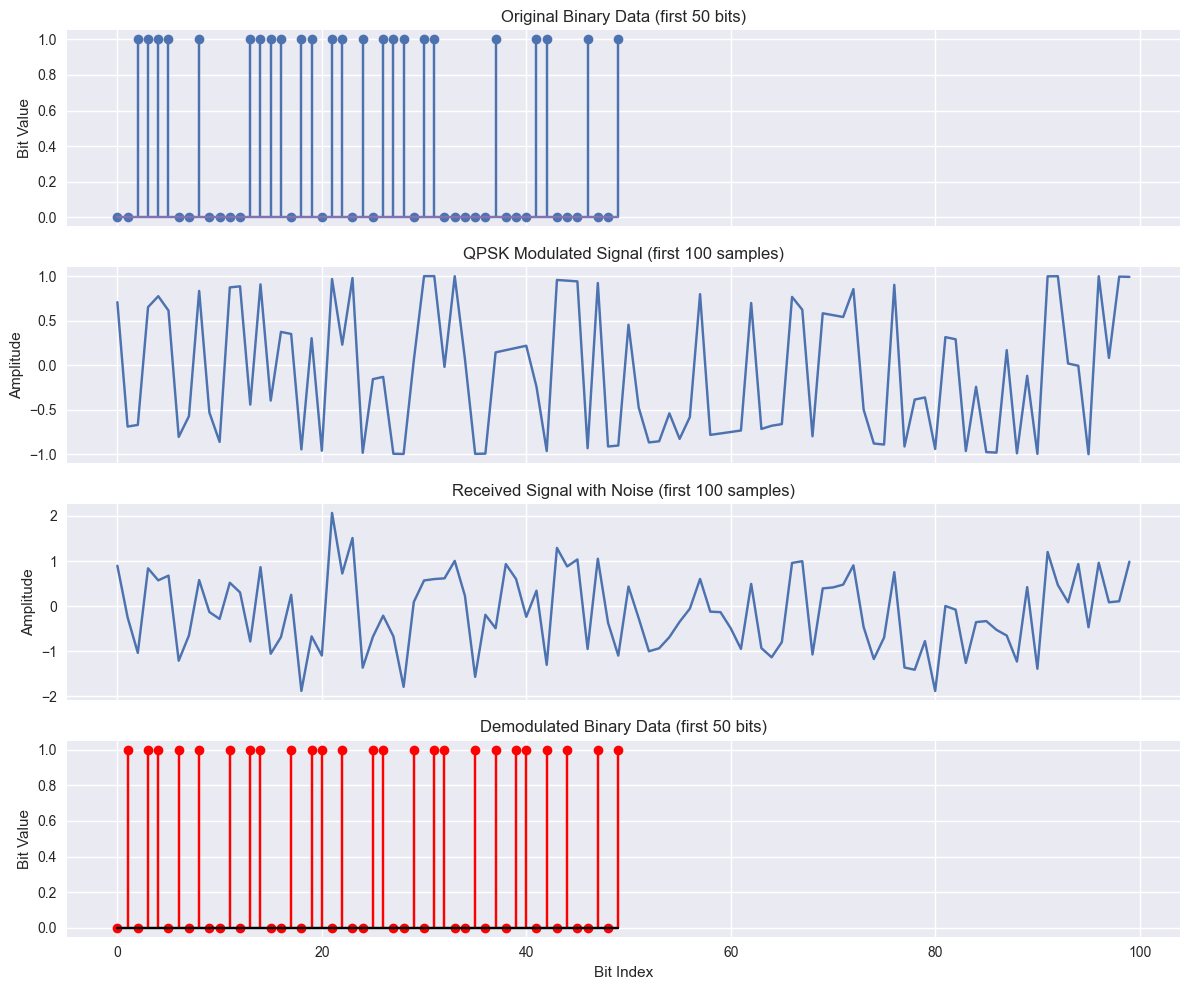

In [12]:
import numpy as np
import matplotlib.pyplot as plt

num_bits = 1000  
if num_bits % 2 != 0:
    num_bits += 1  

Eb = 1  # Energy per bit
N0 = 0.5  
SNR_dB = 10  
SNR = 10**(SNR_dB / 10)

data_bits = np.random.randint(0, 2, num_bits)
if len(data_bits) % 2 != 0:
    data_bits = np.append(data_bits, 0)  
num_bits = len(data_bits)

bit_pairs = data_bits.reshape((-1, 2))
symbol_map = {
    (0, 0): (1/np.sqrt(2), 1/np.sqrt(2)),
    (0, 1): (-1/np.sqrt(2), 1/np.sqrt(2)),
    (1, 1): (-1/np.sqrt(2), -1/np.sqrt(2)),
    (1, 0): (1/np.sqrt(2), -1/np.sqrt(2))
}
symbols = np.array([symbol_map[tuple(b)] for b in bit_pairs])
I = symbols[:, 0]
Q = symbols[:, 1]

fc = 2  
t = np.linspace(0, 1, len(I), endpoint=False)
modulated_signal = I * np.cos(2 * np.pi * fc * t) - Q * np.sin(2 * np.pi * fc * t)

noise = np.sqrt(N0/2) * np.random.randn(len(modulated_signal))
received_signal = modulated_signal + noise

I_demod = received_signal * np.cos(2 * np.pi * fc * t)
Q_demod = -received_signal * np.sin(2 * np.pi * fc * t)

I_hat = np.sign(I_demod)
Q_hat = np.sign(Q_demod)

demod_bits = []
for i, q in zip(I_hat, Q_hat):
    if i > 0 and q > 0:
        demod_bits.extend([0, 0])
    elif i < 0 and q > 0:
        demod_bits.extend([0, 1])
    elif i < 0 and q < 0:
        demod_bits.extend([1, 1])
    elif i > 0 and q < 0:
        demod_bits.extend([1, 0])
demod_bits = np.array(demod_bits)

if len(demod_bits) > num_bits:
    demod_bits = demod_bits[:num_bits]
elif len(demod_bits) < num_bits:
    demod_bits = np.append(demod_bits, [0] * (num_bits - len(demod_bits)))

bit_errors = np.sum(data_bits != demod_bits)
BER = bit_errors / num_bits

plt.style.use('seaborn-v0_8')
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

axs[0].stem(data_bits[:50])
axs[0].set_title('Original Binary Data (first 50 bits)')
axs[0].set_ylabel('Bit Value')

axs[1].plot(modulated_signal[:100])
axs[1].set_title('QPSK Modulated Signal (first 100 samples)')
axs[1].set_ylabel('Amplitude')

axs[2].plot(received_signal[:100])
axs[2].set_title('Received Signal with Noise (first 100 samples)')
axs[2].set_ylabel('Amplitude')

axs[3].stem(demod_bits[:50], linefmt='r-', markerfmt='ro', basefmt='k-')
axs[3].set_title('Demodulated Binary Data (first 50 bits)')
axs[3].set_ylabel('Bit Value')
axs[3].set_xlabel('Bit Index')

plt.tight_layout()

print(f"QPSK simulation completed. Bit Error Rate (BER): {BER:.4f}. Plot saved as qpsk_simulation.png")